# Data Visualization - Plotting Data

- its import to explore and understand your data in Data Science
- typically various statistical graphics are plotted to quickly visualize and understand data
- various libraries work together with Pandas DataFrame and Series datastructrue to quickly plot a data table
- `matploitlib` and `seaborn` which builds on matplotlib are two common ones
- https://matplotlib.org/
- https://seaborn.pydata.org/introduction.html

## create plots in pandas

![](./images/04_plot_overview1.svg)
- let's use air_quality_no2.csv dataset from pandas to demonstrate some plotting
- let's use matploitlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# online raw data URLs
no2_url = 'https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_no2.csv'
pm2_url = 'https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_pm25_long.csv'
air_quality_stations_url = 'https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_stations.csv'
air_qual_parameters_url = 'https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_parameters.csv'

In [11]:
air_quality = pd.read_csv(no2_url, index_col=0, parse_dates=True)

In [12]:
print(air_quality.head())

                     station_antwerp  station_paris  station_london
datetime                                                           
2019-05-07 02:00:00              NaN            NaN            23.0
2019-05-07 03:00:00             50.5           25.0            19.0
2019-05-07 04:00:00             45.0           27.7            19.0
2019-05-07 05:00:00              NaN           50.4            16.0
2019-05-07 06:00:00              NaN           61.9             NaN


<AxesSubplot:xlabel='datetime'>

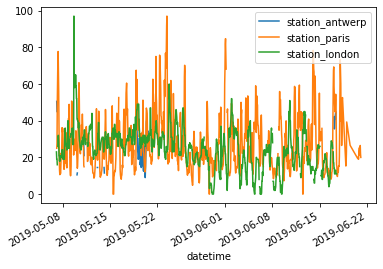

In [13]:
# quick visual check of the data
air_quality.plot()

<AxesSubplot:xlabel='datetime'>

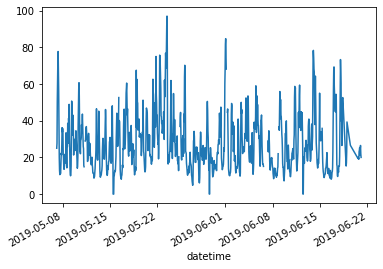

In [15]:
# plot only the station_paris column
air_quality['station_paris'].plot()

<AxesSubplot:xlabel='station_london', ylabel='station_paris'>

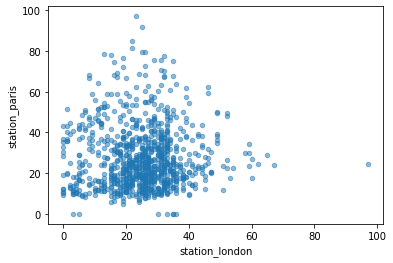

In [16]:
# visually comapre the NO2 values measured in London Vs Paris using scatter ploit
air_quality.plot.scatter(x='station_london', y='station_paris', alpha=0.5)

In [17]:
# let's see all the plotting methods provided in plot module
for method_name in dir(air_quality.plot):
    if not method_name.startswith('_'):
        print(method_name)

area
bar
barh
box
density
hexbin
hist
kde
line
pie
scatter


<AxesSubplot:>

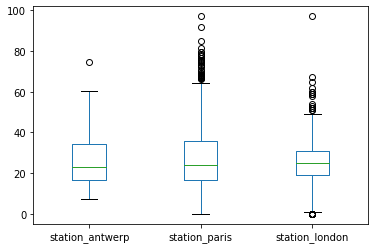

In [18]:
# you can also use tab completion to display all the methods
air_quality.plot.box()

<AxesSubplot:ylabel='datetime'>

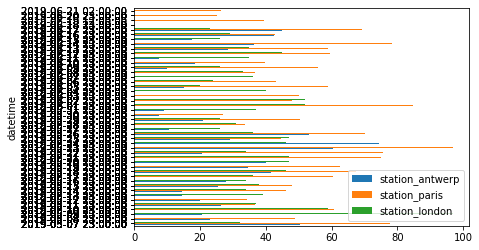

In [19]:
air_quality.plot.barh()

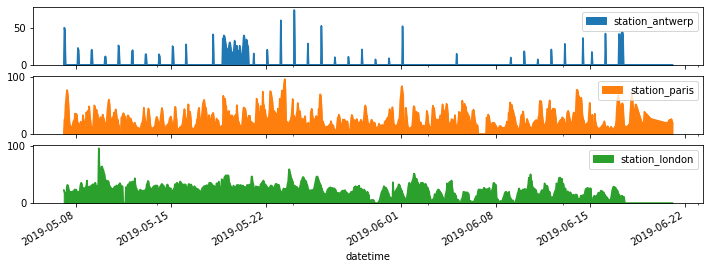

In [23]:
axs = air_quality.plot.area(figsize=(12, 4), subplots=True)

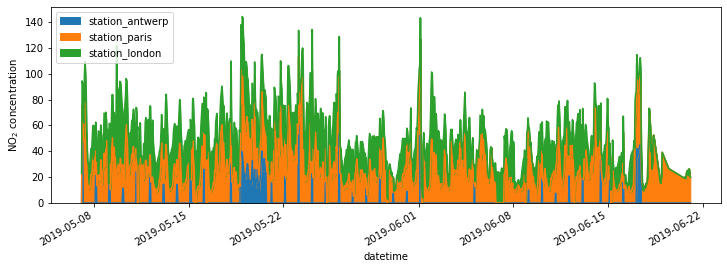

In [25]:
# customize, extend and save the resulting plot
fig, axes = plt.subplots(figsize=(12, 4)) # create an empty matploitlib Fig and Axes
air_quality.plot.area(ax=axes) # use pands to put the area plot on the prepared Figure/Axes
axes.set_ylabel("NO$_2$ concentration") # do the customization
fig.savefig("no2_concerntrations.png") # save the figure

## handling time series data
- pandas makes it easy to work with datetime and time series data
- let's work with air_quality_no2_long.csv dataset to demostrate timeseries data

In [26]:
no2_long_url = 'https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_no2_long.csv'

In [28]:
air_quality_long = pd.read_csv(no2_long_url)

In [29]:
print(air_quality_long.head())

    city country                   date.utc location parameter  value   unit
0  Paris      FR  2019-06-21 00:00:00+00:00  FR04014       no2   20.0  µg/m³
1  Paris      FR  2019-06-20 23:00:00+00:00  FR04014       no2   21.8  µg/m³
2  Paris      FR  2019-06-20 22:00:00+00:00  FR04014       no2   26.5  µg/m³
3  Paris      FR  2019-06-20 21:00:00+00:00  FR04014       no2   24.9  µg/m³
4  Paris      FR  2019-06-20 20:00:00+00:00  FR04014       no2   21.4  µg/m³


In [34]:
air_quality_long = air_quality_long.rename(columns={"date.utc": "datetime"})

In [35]:
print(air_quality_long.head())

    city country                   datetime location parameter  value   unit
0  Paris      FR  2019-06-21 00:00:00+00:00  FR04014       no2   20.0  µg/m³
1  Paris      FR  2019-06-20 23:00:00+00:00  FR04014       no2   21.8  µg/m³
2  Paris      FR  2019-06-20 22:00:00+00:00  FR04014       no2   26.5  µg/m³
3  Paris      FR  2019-06-20 21:00:00+00:00  FR04014       no2   24.9  µg/m³
4  Paris      FR  2019-06-20 20:00:00+00:00  FR04014       no2   21.4  µg/m³


In [36]:
air_quality_long.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [37]:
# let's change datetime colume datatype to Python datetime instead of plaintext
air_quality_long["datetime"] = pd.to_datetime(air_quality_long["datetime"])

In [40]:
print(air_quality_long["datetime"])

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]


### Note: you can also use pd.read_csv(file, parse_dates=["list of column names"]) to parse data as datetime

In [42]:
# find the lasted and oldest dates
air_quality_long["datetime"].max(), air_quality_long['datetime'].min()

(Timestamp('2019-06-21 00:00:00+0000', tz='UTC'),
 Timestamp('2019-05-07 01:00:00+0000', tz='UTC'))

In [43]:
# find the delta
air_quality_long["datetime"].max() - air_quality_long['datetime'].min()

Timedelta('44 days 23:00:00')

In [44]:
# let's add a new column containing only the month to the DataFrame
air_quality_long["month"] = air_quality_long["datetime"].dt.month

In [46]:
air_quality_long.head()

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6


## groupby
- grouping data by some column value and finding aggregate information
- find average $NO_2$ concentration for each day of the week for each of the measurement locations

In [47]:
air_quality_long.groupby([air_quality_long["datetime"].dt.weekday, "location"])["value"].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

### plot timeseries
- plot the typical $NO_2$ pattern during the day of time series of all stations together
    - what is the average value for each hour of the day?

Text(0, 0.5, '$NO_2 (\\mu g/m^3)$')

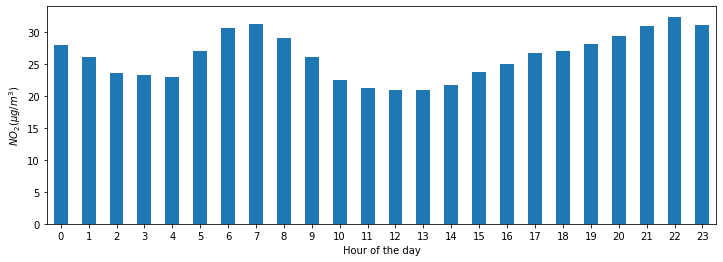

In [55]:
fig, axs = plt.subplots(figsize=(12, 4))
air_quality_long.groupby(air_quality_long["datetime"].dt.hour)["value"].mean().plot(kind='bar', rot=0, ax=axs)
plt.xlabel("Hour of the day")
plt.ylabel("$NO_2 (\mu g/m^3)$")

## reshaping pandas dataframe
- `pivot()` lets us reshape the data table
- let's use datetime as index and measurement locations as a separate columns
- DatetimeIndex class contains many time series related optimizations: https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-datetimeindex

In [56]:
no_2 = air_quality_long.pivot(index="datetime", columns="location", values="value")

In [57]:
no_2.head()
# notice values from some indices and columns may not exist and are filled with NaN

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


In [58]:
no_2.index.year

Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='datetime', length=1033)

In [59]:
no_2.index.weekday, no_2.index.day

(Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             ...
             3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
            dtype='int64', name='datetime', length=1033),
 Int64Index([ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
             ...
             20, 20, 20, 20, 20, 20, 20, 20, 20, 21],
            dtype='int64', name='datetime', length=1033))

### Plot between some date range
- create a plot of the $NO_2$ values in the different stations from the 20th May till the end of 21st of May

<AxesSubplot:xlabel='datetime'>

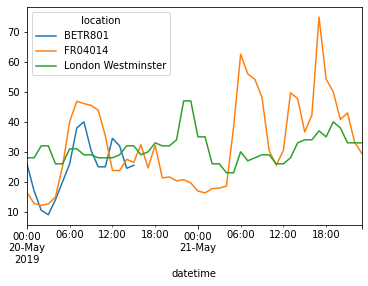

In [60]:
no_2["2019-05-20":"2019-05-21"].plot()

## resampling a time series to another frequency
- aggregate the current hourly time series values to the monthly maximum value in each of the stations

In [61]:
monthly_max = no_2.resample("M").max()

In [62]:
monthly_max.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,74.5,97.0,97.0
2019-06-30 00:00:00+00:00,52.5,84.7,52.0


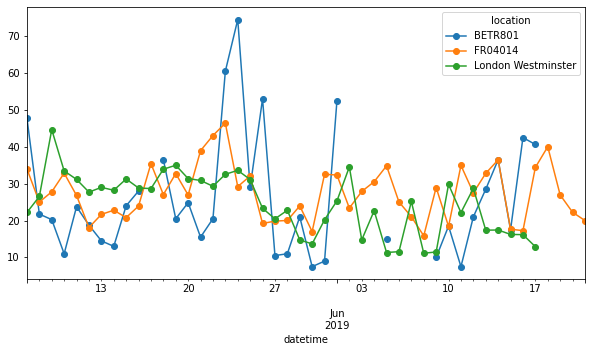

In [63]:
# plot daily mean NO2 value in each stations
no_2.resample("D").mean().plot(style="-o", figsize=(10, 5));

## Seaborn
- [https://seaborn.pydata.org/introduction.html](https://seaborn.pydata.org/introduction.html)
- library for making statistical graphics in Python
- builds on matplotlib and integrates closely with pandas data
- seaborn performs the necessary semantic mapping and statisticall aggregation to product informative plots
- data-set oriented and declarative which lets you focus on the understanding the plots rather than how to draw them
- provides easy API access to various datasets to experiment with

### installation
- use pip or conda
```bash
pip install seaborn
conda install seaborn
```


### API reference
- https://seaborn.pydata.org/api.html
- seaborn.relplot
    - https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot

In [64]:
import seaborn as sns

# apply the default theme
sns.set_theme()

In [65]:
# loat an example data sets, tips
tips = sns.load_dataset('tips')

In [68]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


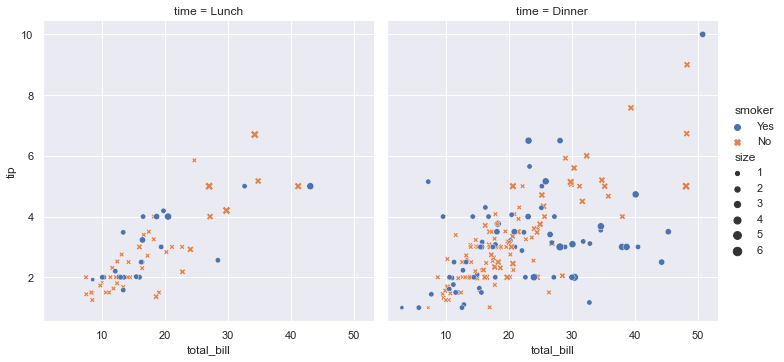

In [69]:
# create a visualization
sns.relplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker", style="smoker", size="size")